# Graphe pré construit avec la position donnée par networkx

### on import les bibliothèques utiles et on crée notre class  

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
import pandas as pd

In [2]:
class GrapheConstruit :
    def __init__(self, nodes, edges, NombreAttributs, NombreAttributsPersonne):
        """on intitialise notre graphe on demande les nodes et les edges déjà construits .
        on va ensuite attribuer aléatoirement à chaque connexion (edges) un nombre d'attributs partagés entre les deux nodes
        ces attributs sont tirés aléatoirement parmis un nombre d'attributs total demandé"""
        
        self.nodes= list(nodes)
        self.edges= list(edges)
        self.NombrePersonnes= len(nodes)
        self.graph= {}
        
        # on définit un type de lien pour différencier les différents liens que l'on va créer
        self.EdgesType=[]
        
        # on initialise notre graphe, on lui donne les nodes
        for i in nodes:
            self.graph[i]=[]
        
        # on initialise notre graphe, on lui donne pour chaque node ces différentes connexions
        for i in nodes:
            for j in edges:
                if i == j[0]:
                    
                    # on choisit aléatoirement un certain nombre d'attributs pour chaque lien
                    Attributs=random.sample(range(1,NombreAttributs), NombreAttributsPersonne)
                    
                    # on attribue aux nodes du graphe 3 éléments ( le node avec lequel il est connecté, les attributs en commun, le type de connexion )
                    self.graph[i].append([j[1],Attributs,0])
                    self.graph[j[1]].append([i,Attributs,0])
                    
                    # ici on marque que le type de connexion est 0 
                    self.EdgesType.append(0)
    
    
    def CreerConnexion (self, i, j, k, n):
        """on crée une fonction qui permet de créer une connexion entre deux nodes i et j avec k comme le node commun aux deux."""
        
        # on cherche a obtenir la position du node k dans la liste des connexions de i et de j
        # on peut noter que ces deux positions sont différentes car les listes de connexion de i et de j sont différentes
        pos_k_i = [self.graph[i][l][0] for l in range (len(self.graph[i]))].index(k)
        pos_k_j = [self.graph[j][l][0] for l in range (len(self.graph[j]))].index(k)
        
        #on créer une liste contenant les attributs communs à la liaison (i,k) et (k,j)
        AttributsCommuns=list(set(self.graph[i][pos_k_i][1]).intersection(self.graph[j][pos_k_j][1]))
        
        #on créer cette nouvelle connexion dans notre graphe
        self.graph[i].append([j,AttributsCommuns,n])
        self.graph[j].append([i,AttributsCommuns,n])
        
        #on ajoute aussi les nouvelles données à nos listes
        self.edges.append((i,j))
        self.EdgesType.append(n)
    
    def evolution (self, ScoreMinimum):
        """Cette fonction permet de définir le processus de connexion. La méthode utilisée est celle 
        de l'évolution du réseau par recommendation"""
        NouvelleConnexion = []
        
        # on boucle sur tout les "possibles edges" du réseau (ie: tout les couples (i,j))
        for i in range (self.NombrePersonnes):
            for j in range(i):
                
                scores=[]
                
                # on créer une liste avec toutes les connexions créées avec i
                connexion_i=[self.graph[i][k][0] for k in range(len(self.graph[i]))]
        
                # si j fait déjà partie de la liste c'est que i et j sont déjà connectés, on ne veut pas ce cas là
                if not j in connexion_i :
                    
                    # on créer une liste avec toutes les connexions créées avec j
                    connexion_j=[self.graph[j][k][0] for k in range(len(self.graph[j]))]
                    
                    #si l'on trouve au moins 1 node de commun entre les différentes connexions, on continue
                    if len(set(connexion_i).intersection(connexion_j)):
                        
                        # pour tout les nodes en communs il faut calculer celui qui a le meilleur score
                        for k in set(connexion_i).intersection(connexion_j):
                            
                            # on trouve la position de k (le node commun) dans les toutes les connexions de i et j
                            pos_i = connexion_i.index(k)
                            pos_j = connexion_j.index(k)
                            
                            # pour calculer le score de cette "possible" connexion on calcule le nombre d'attributs en communs
                            score= len(set(self.graph[i][pos_i][1]).intersection(self.graph[j][pos_j][1]))
                            
                            # on stocke le score avec le noeud en commun
                            scores.append([k,score])
                        
                        # on cherche le meilleur score
                        scores = sorted (scores, key= itemgetter(1), reverse= True)
                        MeilleurScore = sorted (scores, key= itemgetter(1), reverse= True)[0]
                        
                        if MeilleurScore[1] > ScoreMinimum :
                            
                            # si le meilleur score est supèrieur à une certaine valeur on crée la connexion
                            NouvelleConnexion.append([i,j,MeilleurScore[0],1])
        
        
        # on crée les nouvelles connexions à la fin pour pas géner l'algo                     
        for k in NouvelleConnexion:
            GrapheConstruit.CreerConnexion(self, *k)
    
    
    def ProcessOfEvolution (self, ScoreMinimum, NombreIterations=1 ):
        """ fonction qui itère un nombre de fois donné l'évolution du network"""
        for i in range (NombreIterations):
            
            GrapheConstruit.evolution(self, ScoreMinimum)
            print(i+1,"eme étape faite")
    
    def AjoutCouleurs (self, ListeTypeConnexion, Connexion0 = 'k', Connexion1 = 'b'):
        """permet d'ajouter des couleurs suivant le type de connexion"""
        self.EdgesColor=[]
        for i in ListeTypeConnexion :
            if i == 0:
                self.EdgesColor.append( Connexion0 )
            if i == 1:
                self.EdgesColor.append( Connexion1 )                
         
    def GetPos (self, A):
        """permet d'enregiter les positions des pts initials """
        self.pos={}
        for i in A.nodes():
            self.pos[i]=A.nodes[i]['pos']
        return self.pos

    
    def InitPropagation ( self, NombreAttributsMinimum = 0):
        """On initialise le graph dans le quel on va travailler"""
        
        

        #on crée un nouveau graph 
        self.GraphPropagation={}
        self.EdgesPropagation= []
        self.EdgesTypePropagation= []
        self.NodesType= []
        
            
        for i in self.nodes :
            self.GraphPropagation[i]=[]
            self.NodesType.append(0)

            # pour tous les noeuds on regarde les connexions créées
            for connexion in self.graph[i]:

                # on garde la connexion si il y a assez d'attributs en commun
                if len(connexion[1]) >= NombreAttributsMinimum :
                    self.GraphPropagation[i].append([connexion[0],connexion[1],0])

                    # boucle if pour ne pas avoir deux fois la même connexion
                    if i < connexion[0]:  
                        self.EdgesPropagation.append((i,connexion[0]))
                        self.EdgesTypePropagation.append (0)
        
        # on def aléatoirement une personne touchée que l'on met dans une liste de toute les personnes touchées
        self.PersonnesTouchees =[random.randint(1, self.NombrePersonnes)]
        self.NodesType[self.PersonnesTouchees[0]]=1
        


    def PropagationDeProcheEnProche ( self, PersonneInitiale, PersonneTouchee):
        """Permet d'actualiser le statut d'une personne touchée dans le graphe"""
        
        # on actualise le type de personne
        self.NodesType[PersonneTouchee] =1
        self.PersonnesTouchees.append(PersonneTouchee)
    
        # on actualise le type de noeud dans le dictionnaire
        self.GraphPropagation[PersonneTouchee][ [connexion[0] for connexion in self.GraphPropagation[PersonneTouchee] ].index(PersonneInitiale) ][2] =1
        self.GraphPropagation[PersonneInitiale][ [connexion[0] for connexion in self.GraphPropagation[PersonneInitiale] ].index(PersonneTouchee) ][2] =1
        
        # on actualise le type de noeud dans la liste
        if PersonneInitiale < PersonneTouchee:
            self.EdgesTypePropagation[self.EdgesPropagation.index((PersonneInitiale, PersonneTouchee))] =1
        else :
            self.EdgesTypePropagation[self.EdgesPropagation.index((PersonneTouchee, PersonneInitiale))] =1
            

        
        
        
        
    def propagation(self, probabilite):
        """On va simulier une propagation dans un graphe"""
        
        #liste des personnes qui vont être touchées pendant cette vague
        liste=[]
        
        # on parcourt toutes les personnes touchées
        for personne in self.PersonnesTouchees:
            
            # on parcourt ses connexions
            for connexion in self.GraphPropagation[personne]:
                
                # on s'intéresse qu'aux connexions qui ne sont pas touchées
                if not self.NodesType[connexion[0]] :

                    # la personne est touchée avec une certaine probabilité
                    if random.random() <= probabilite :
                        
                        liste.append((personne,connexion[0]))
    
        for element in liste :
            i,j = element
            GrapheConstruit.PropagationDeProcheEnProche( self, i, j)
                
                
    def AlgoPropagation( self, probabilite =1, NombreIteration =1):
        """on fait boucler la fonction propagation "NombreIteration" de fois """
        
        for i in range (NombreIteration):
            GrapheConstruit.propagation( self, probabilite)
                
    

### on charge notre graphe

In [48]:
NombreAttributsParPersonne = 40
NombreAttributstotal = 100
ScoreMinimum = 15
NombreIterations = 5
NomFichier = 'graphgeometric1000nodes'

F = nx.random_geometric_graph(2000, 0.020)

In [49]:
A=GrapheConstruit (F.nodes(),F.edges(), NombreAttributstotal, NombreAttributsParPersonne)
pos=A.GetPos(F)

### on affiche notre graphe

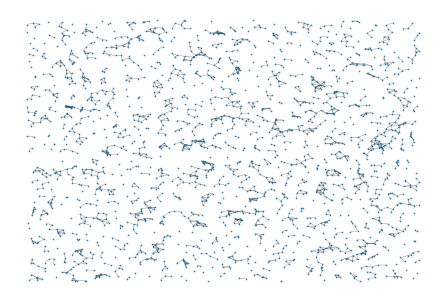

In [50]:

G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
nx.draw(G,pos,node_size = 0.4,width= 0.2)
plt.savefig("Initial.png") # save as png
plt.show() # display

### on fait évoluer notre graphe

In [51]:
A.ProcessOfEvolution(ScoreMinimum, NombreIterations)

0 ok
1 ok
2 ok
3 ok
4 ok


### on affiche le nouveau graphe

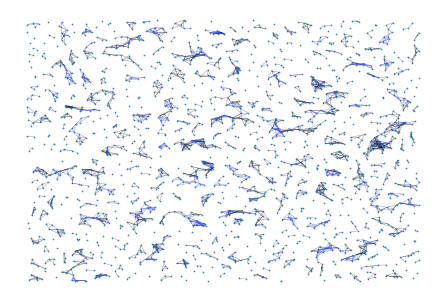

In [52]:
A.AjoutCouleurs(A.EdgesType)
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
nx.draw(G,pos,node_size = 0.4,width= 0.2,edge_color= list(A.EdgesColor))
plt.savefig("Final.png") # save as png
plt.show() # display

### processus de propagation

initialisation

In [53]:
A.InitPropagation(15)

Propagation

In [54]:
A.AlgoPropagation(0.4,30)

On affiche le graphique

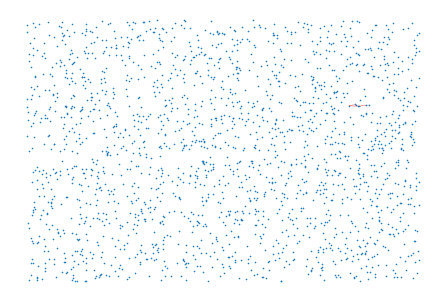

In [55]:
A.AjoutCouleurs(A.EdgesTypePropagation,'w','r')
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.EdgesPropagation)
nx.draw(G,pos,node_size = 0.4,width= 0.2,edge_color= list(A.EdgesColor))
plt.savefig("Propagation.png") # save as png
plt.show() # display

### pour conserver le graphe

In [7]:
df= pd.DataFrame({'nodes':A.nodes,'edges':[[A.graph[i][k] for k in range(len(A.graph[i]))] for i in range(len(A.nodes))],'pos':[pos[i] for i in range(len(A.nodes))]})
df.to_csv('Data500nodes.csv')
df.head()

,nodes,edges,pos
0,0,"[[262, [5, 86, 38, 43, 64, 40, 18, 80, 87, 59,...","[0.6893334093158041, 0.6254581475110521]"
1,1,"[[358, [33, 14, 27, 47, 35, 73, 62, 67, 87, 85...","[0.11913012084817354, 0.6852655855506172]"
2,2,"[[16, [1, 60, 81, 63, 84, 34, 3, 99, 35, 8, 73...","[0.8482362287541825, 0.941221099922881]"
3,3,"[[438, [46, 4, 54, 72, 36, 48, 64, 11, 23, 43,...","[0.7187534452648812, 0.5266571905235387]"
4,4,"[[214, [40, 59, 64, 34, 23, 1, 28, 57, 63, 61,...","[0.7986006738612884, 0.6815915899327846]"


In [41]:
df.to_csv(NomFichier+'.csv')